# **Web Mining and Recommender Systems (HDSC411) Assignment 2**

## **Group Members**
1. Lindsay Kundai Jambawo R215907N HDSC
2. Peter Takudzwa Makoto R215919Z HDSC
3. Selby Kudakwashe Chipunza R215897A HDSC
4. Tichaona Mutomba R215924Q HDSC
5. Andrew Mashamaire R215923C HDSC
6. Charmaine Makara R219487C HDSC

-----------------------------------------------------------------------------



# **Data Loading**

In [ ]:
#upload data from pc without connecting drive
from google.colab import files
uploaded = files.upload()

Saving music data.csv to music data.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds



try:
    # Try reading the CSV file with 'latin-1' encoding
    df = pd.read_csv('music data.csv', encoding='latin-1')
except Exception as e:
    print(f"Error reading the CSV file: {e}")
    # Exit or handle error appropriately if file loading fails
    exit()

<ipython-input-2-20d02b593392>:12: DtypeWarning: Columns (1,2,3,4,7,20,21,24,25,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('music data.csv', encoding='latin-1')


In [ ]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,track_genre,user_id,rating,play_count,likes_timestamp,skip_flag,skip_count,playlist_id,tags,mumber of likes
0,0.0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73.0,230666.0,False,0.676,0.4610,...,acoustic,user_2,5.0,32.0,04-05-25 14:08,False,0.0,13.0,"['danceable', 'happy', 'focus', 'melancholic']",41.0
1,1.0,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55.0,149610.0,False,0.420,0.1660,...,acoustic,user_63,4.9,37.0,07-09-24 14:08,False,0.0,2.0,"['calm', 'background', 'energetic']",27.0
2,2.0,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57.0,210826.0,False,0.438,0.3590,...,acoustic,user_35,5.0,34.0,12-04-25 14:08,False,0.0,18.0,"['uplifting', 'focus', 'acoustic']",33.0
3,3.0,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71.0,201933.0,False,0.266,0.0596,...,acoustic,user_52,5.0,40.0,09-02-25 14:08,True,2.0,11.0,"['danceable', 'energetic', 'focus', 'acoustic']",40.0
4,4.0,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82.0,198853.0,False,0.618,0.4430,...,acoustic,user_89,5.0,35.0,05-07-24 14:08,False,0.0,12.0,"['focus', 'danceable', 'background', 'calm']",40.0


# **Data Preprocessing**

In [ ]:
try:
    df = df.drop(columns=['Unnamed: 0'])
    print("Column 'Unnamed: 0' dropped successfully.")
    df.head()
except KeyError:
    print("Column 'Unnamed: 0' not found in the DataFrame.")


Column 'Unnamed: 0' dropped successfully.


In [ ]:
# prompt: drop all the nan values in the data

df.dropna(inplace=True)


In [ ]:
df.tail()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,track_genre,user_id,rating,play_count,likes_timestamp,skip_flag,skip_count,playlist_id,tags,mumber of likes
5995,1WLrDCDhR7P7ySlWIihkNz,Laharl Square;omar1up,"Ángeles y Demonios (From ""Dragon Ball Super"")","Ángeles y Demonios (From ""Dragon Ball Super"")",32.0,287921.0,False,0.506,0.658,0.0,...,anime,user_71,3.1,25.0,27-11-24 14:08,True,4.0,6.0,"['danceable', 'background']",9.0
5996,6AkgUeyAQrfkyqUflI6Mai,Kballero Rap,Baki. Convictos Condenados Rap,Baki. Convictos Condenados Rap,33.0,162262.0,False,0.710,0.860,2.0,...,anime,user_3,4.5,22.0,12-08-24 14:08,False,0.0,15.0,"['happy', 'melancholic', 'chill']",14.0
5997,35v3wgsNYfAZj02N4cKuxJ,DeGoBooM,Hacha Suculenta,Hacha Suculenta,32.0,141710.0,False,0.771,0.692,1.0,...,anime,user_83,4.0,30.0,11-04-25 14:08,True,1.0,20.0,"['acoustic', 'focus', 'calm', 'energetic']",8.0
5998,1Tv2ZJbnp5IN9QOtphIUQE,Doblecero,Buda vs Hajun,Buda vs Hajun,33.0,229503.0,False,0.810,0.965,3.0,...,anime,user_20,4.8,17.0,28-11-24 14:08,False,0.0,15.0,"['danceable', 'background', 'happy']",14.0
5999,6y7oe8iNHTsQNF21FH17Zi,Keyblade,Cuestión de Fe (Outlast 2 Rap),Cuestión de Fe (Outlast 2 Rap),32.0,201257.0,True,0.640,0.803,3.0,...,anime,user_87,4.2,28.0,24-07-24 14:08,False,0.0,2.0,"['energetic', 'happy']",12.0


# **Data Exploration**

In [ ]:
# --- 2. Exploratory Data Analysis ---
n_users = df['user_id'].nunique()
n_items = df['track_id'].nunique()
print(f"\nNumber of unique users: {n_users}")
print(f"Number of unique tracks: {n_items}")


Number of unique users: 98
Number of unique tracks: 5399


In [ ]:
print("\nRatings Distribution:")
print(df['rating'].describe())


Ratings Distribution:
count    6000.000000
mean        4.311900
std         0.918667
min         1.000000
25%         3.700000
50%         4.900000
75%         5.000000
max         5.000000
Name: rating, dtype: float64


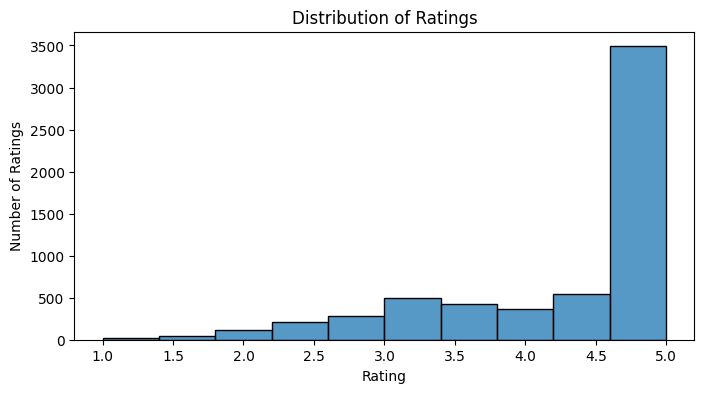

In [ ]:
# Plot ratings distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['rating'], bins=10, kde=False)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.show() # Displaying plot is commented out for brevity in consolidation

In [ ]:
# --- 3. Create User-Item Matrix ---
user_item_matrix = df.pivot_table(index='user_id', columns='track_id', values='rating')
user_item_matrix_filled = user_item_matrix.fillna(0)
print(f"\nShape of User-Item Matrix: {user_item_matrix_filled.shape}")


Shape of User-Item Matrix: (98, 5399)


In [ ]:
n_ratings = len(df)
possible_ratings = n_users * n_items
sparsity = 1.0 - (n_ratings / possible_ratings)
print(f"\nSparsity of the user-item matrix: {sparsity:.4f} ({(sparsity*100):.2f}%)")


Sparsity of the user-item matrix: 0.9887 (98.87%)


In [ ]:
# Create a mapping from track_id to track_name
track_id_to_name = df.set_index('track_id')['track_name'].to_dict()

# **Collaborative Filtering Implementations**

### **User-Based Collaborative Filtering**

In [ ]:
# --- 4. Collaborative Filtering Implementations ---

# === 4a. User-Based Collaborative Filtering ===
print("\n--- Calculating User-Based CF ---")
# Calculate User Similarity
user_similarity = cosine_similarity(user_item_matrix_filled)
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix_filled.index, columns=user_item_matrix_filled.index)


--- Calculating User-Based CF ---


In [ ]:
# Recommendation Function (User-Based)
def get_user_recommendations(user_id, user_sim_df, user_item_mat, track_id_map, n=10):
    if user_id not in user_sim_df.index: return f"User '{user_id}' not found."
    sim_scores = user_sim_df[user_id].drop(user_id)
    top_n_similar_users = sim_scores.nlargest(30).index
    top_n_similar_scores = sim_scores.nlargest(30).values
    if len(top_n_similar_users) == 0: return [] # No similar users found
    similar_users_ratings = user_item_mat.loc[top_n_similar_users]
    weighted_sum_ratings = similar_users_ratings.T.dot(top_n_similar_scores)
    # Calculate sum of similarities only for users who rated the item
    sum_of_similarities = np.zeros(similar_users_ratings.shape[1])
    for i, item_id in enumerate(similar_users_ratings.columns):
      # Find indices of similar users who rated this item
      rated_user_indices = np.where(similar_users_ratings[item_id] > 0)[0]
      if len(rated_user_indices) > 0:
         # Get the similarity scores corresponding to these users
         sims_for_item = top_n_similar_scores[rated_user_indices]
         sum_of_similarities[i] = sims_for_item.sum()

    sum_of_similarities[sum_of_similarities == 0] = 1 # Avoid division by zero
    predicted_scores = weighted_sum_ratings / sum_of_similarities
    predicted_scores_df = pd.DataFrame(predicted_scores, index=user_item_mat.columns, columns=['predicted_rating'])
    rated_items = user_item_mat.loc[user_id]
    rated_items = rated_items[rated_items > 0].index.tolist()
    recommendations = predicted_scores_df.drop(rated_items, errors='ignore')
    top_recommendations = recommendations.nlargest(n, 'predicted_rating')
    top_recs_with_names = top_recommendations.index.map(track_id_map).dropna().tolist()
    return top_recs_with_names

### **Item-Based Collaborative Filtering**

In [ ]:

# === 4b. Item-Based Collaborative Filtering ===
print("--- Calculating Item-Based CF ---")
# Calculate Item Similarity
item_similarity = cosine_similarity(user_item_matrix_filled.T)
item_similarity_df = pd.DataFrame(item_similarity, index=user_item_matrix_filled.columns, columns=user_item_matrix_filled.columns)

--- Calculating Item-Based CF ---


In [ ]:
# Recommendation Function (Item-Based)
def get_item_recommendations(user_id, item_sim_df, user_item_mat, track_id_map, n=10):
    if user_id not in user_item_mat.index: return f"User '{user_id}' not found."
    user_ratings = user_item_mat.loc[user_id]
    rated_items = user_ratings[user_ratings > 0]
    if rated_items.empty: return [] # User hasn't rated any items
    candidate_scores = {}
    for item_id, rating in rated_items.items():
        if item_id not in item_sim_df.index: continue # Item might not be in similarity matrix if filtered
        sim_scores_for_item = item_sim_df[item_id]
        for other_item_id, similarity in sim_scores_for_item.items():
            if other_item_id not in rated_items.index and similarity > 0:
                if other_item_id not in candidate_scores:
                    candidate_scores[other_item_id] = {'weighted_sum': 0, 'similarity_sum': 0}
                candidate_scores[other_item_id]['weighted_sum'] += similarity * rating
                candidate_scores[other_item_id]['similarity_sum'] += similarity
    predicted_scores = {}
    for item_id, scores in candidate_scores.items():
        if scores['similarity_sum'] > 0:
             predicted_scores[item_id] = scores['weighted_sum'] / scores['similarity_sum']
    predicted_scores_series = pd.Series(predicted_scores)
    top_recommendations = predicted_scores_series.nlargest(n)
    top_recs_with_names = top_recommendations.index.map(track_id_map).dropna().tolist()
    return top_recs_with_names

### **Matrix Factorization (SVD)**

In [ ]:
# === 4c. Matrix Factorization (SVD) ===
print("--- Calculating SVD-Based CF ---")
user_item_matrix_svd = user_item_matrix_filled.copy()
k = 50
k = min(k, user_item_matrix_svd.shape[0] - 1, user_item_matrix_svd.shape[1] - 1)
svd_recs = "SVD Failed" # Default message
predicted_ratings_df = None
try:
    U, sigma, Vt = svds(user_item_matrix_svd.values, k=k)
    sigma_diag = np.diag(sigma)
    predicted_ratings = np.dot(np.dot(U, sigma_diag), Vt)
    predicted_ratings_df = pd.DataFrame(predicted_ratings, index=user_item_matrix_svd.index, columns=user_item_matrix_svd.columns)
except Exception as e:
    print(f"Error during SVD: {e}")
    svd_recs = f"SVD computation failed: {e}"

--- Calculating SVD-Based CF ---


In [ ]:
# Recommendation Function (SVD-Based)
def get_svd_recommendations(user_id, preds_df, original_user_item_mat, track_id_map, n=10):
    if user_id not in preds_df.index: return f"User '{user_id}' not found."
    user_predicted_ratings = preds_df.loc[user_id].sort_values(ascending=False)
    rated_items = []
    if user_id in original_user_item_mat.index:
        user_original_ratings = original_user_item_mat.loc[user_id]
        rated_items = user_original_ratings[user_original_ratings > 0].index.tolist()
    recommendations = user_predicted_ratings.drop(rated_items, errors='ignore')
    top_recommendations = recommendations.head(n)
    top_recs_with_names = top_recommendations.index.map(track_id_map).dropna().tolist()
    return top_recs_with_names

### **Generating Recommendations for a Target User**

In [ ]:
# --- 5. Generate Recommendations for a Target User ---
target_user_id = 'user_2' # Example user

# User-Based
if target_user_id in user_similarity_df.index:
    user_based_recs = get_user_recommendations(target_user_id, user_similarity_df, user_item_matrix_filled, track_id_to_name, n=10)
else:
    user_based_recs = f"User '{target_user_id}' not found."

# Item-Based
if target_user_id in user_item_matrix_filled.index:
    item_based_recs = get_item_recommendations(target_user_id, item_similarity_df, user_item_matrix_filled, track_id_to_name, n=10)
else:
    item_based_recs = f"User '{target_user_id}' not found."

# SVD-Based
if predicted_ratings_df is not None and target_user_id in predicted_ratings_df.index:
    svd_recs = get_svd_recommendations(target_user_id, predicted_ratings_df, user_item_matrix_filled, track_id_to_name, n=10)
elif predicted_ratings_df is not None:
     svd_recs = f"User '{target_user_id}' not found in SVD predictions."
# If SVD failed earlier, svd_recs retains the error message

### **Results**

In [ ]:
# --- 6. Display Consolidated Results ---
print(f"\n--- Consolidated Top 10 Recommendations for {target_user_id} ---")

print("\nUser-Based Collaborative Filtering:")
if isinstance(user_based_recs, list):
    if user_based_recs:
        for i, track_name in enumerate(user_based_recs): print(f"{i+1}. {track_name}")
    else:
        print("No recommendations generated (perhaps no similar users or rated items).")
else: print(user_based_recs)

print("\nItem-Based Collaborative Filtering:")
if isinstance(item_based_recs, list):
    if item_based_recs:
        for i, track_name in enumerate(item_based_recs): print(f"{i+1}. {track_name}")
    else:
        print("No recommendations generated (perhaps user has no ratings or no similar items found).")
else: print(item_based_recs)

print("\nSVD-Based Collaborative Filtering:")
if isinstance(svd_recs, list):
    if svd_recs:
        for i, track_name in enumerate(svd_recs): print(f"{i+1}. {track_name}")
    else:
        print("No recommendations generated.")
else: print(svd_recs) # Print error message or 'not found' message


--- Consolidated Top 10 Recommendations for user_2 ---

User-Based Collaborative Filtering:
1. Life
2. Waves of Panic
3. Sons and Daughters
4. 10,000 Reasons (Bless The Lord) - Live
5. Tell The World
6. Way down We Go
7. Heart-Shaped Box
8. Mi Corazón Encantado - Dragon Ball Gt
9. Back to You
10. Kids

Item-Based Collaborative Filtering:
1. Watashi No Uso (Your Lie in April Original Soundtrack)
2. Home
3. Paradise
4. Planet Zero
5. No Me Sueltes (Es Posible)
6. All Summer Long
7. Enemy - Epic Version (from Arcane League of Legends)
8. Não Existe Amor Em SP - Live
9. fmk (with blackbear)
10. Perfect Time

SVD-Based Collaborative Filtering:
1. Perfect Time
2. Photograph
3. 1/1 - Remastered 2004
4. Home
5. Watashi No Uso (Your Lie in April Original Soundtrack)
6. hutchison - improvisation
7. The Lotto
8. fmk (with blackbear)
9. Enemy - Epic Version (from Arcane League of Legends)
10. In Bloom


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

In [ ]:
# Drop rows where essential info is missing
# Need user_id, track_id, rating for user recs; user_id, playlist_id for playlist recs
df_clean = df.dropna(subset=['user_id', 'track_id', 'rating', 'playlist_id', 'track_name']).copy()

# Select relevant columns
df_recs = df_clean[['user_id', 'track_id', 'track_name', 'rating', 'playlist_id']].copy()

# Remove duplicate user-track ratings (might affect playlist counts slightly, but simplifies)
df_recs = df_recs.drop_duplicates(subset=['user_id', 'track_id'], keep='first')

# Ensure playlist_id is a usable type (string for MLB)
df_recs['playlist_id'] = df_recs['playlist_id'].astype(int).astype(str)

print(f"Data prepared. Shape: {df_recs.shape}")
if df_recs.empty:
    print("No data available after cleaning. Exiting.")
    exit()

# --- Task A: Playlist Recommendation ---
print("\n--- Preparing for Playlist Recommendation ---")

# 1. Aggregate User-Playlist Interactions
# Get unique playlists each user interacted with (based on rated tracks)
user_playlist_interactions = df_recs.groupby('user_id')['playlist_id'].unique().reset_index()
print(f"Found interactions for {len(user_playlist_interactions)} users with playlists.")

# 2. Create User-Playlist Interaction Matrix (Binary)
if not user_playlist_interactions.empty:
    mlb = MultiLabelBinarizer()
    try:
        user_playlist_matrix = pd.DataFrame(
            mlb.fit_transform(user_playlist_interactions['playlist_id']),
            index=user_playlist_interactions['user_id'],
            columns="playlist_" + mlb.classes_ # Prepend 'playlist_' to avoid potential numeric column issues
        )
        print(f"User-Playlist Matrix created. Shape: {user_playlist_matrix.shape}")

        # 3. Calculate User Similarity (based on Playlists)
        # Using cosine similarity on the binary matrix
        user_playlist_similarity = cosine_similarity(user_playlist_matrix)
        user_playlist_similarity_df = pd.DataFrame(
            user_playlist_similarity,
            index=user_playlist_matrix.index,
            columns=user_playlist_matrix.index
        )
        print("User similarity matrix based on playlists calculated.")

    except Exception as e:
        print(f"Error creating user-playlist matrix or similarity: {e}")
        user_playlist_matrix = None
        user_playlist_similarity_df = None
else:
    print("No user-playlist interactions found.")
    user_playlist_matrix = None
    user_playlist_similarity_df = None


# 4. Playlist Recommendation Function
def recommend_playlists(target_user_id, user_playlist_mat, user_playlist_sim_df, n=5):
    """Recommends playlists based on users with similar playlist interactions."""
    if user_playlist_mat is None or user_playlist_sim_df is None:
        return "Recommendation engine not ready (missing matrix or similarity)."
    if target_user_id not in user_playlist_sim_df.index:
        return f"User '{target_user_id}' not found in playlist interactions."

    # Get similarity scores for the target user, exclude self
    sim_scores = user_playlist_sim_df[target_user_id].drop(target_user_id)

    # Consider only users with positive similarity
    sim_scores = sim_scores[sim_scores > 0]
    if sim_scores.empty:
        return "No similar users found based on playlist interactions."

    # Get top N similar users
    # We can use more than N similar users to get better recommendations
    top_similar_users = sim_scores.nlargest(30).index # Use top 30 similar users

    # Get playlists interacted with by the target user
    target_user_playlists = set(user_playlist_mat.loc[target_user_id][user_playlist_mat.loc[target_user_id] > 0].index)

    # Find playlists liked by similar users but not by the target user
    candidate_playlists = {}
    similar_users_playlists = user_playlist_mat.loc[top_similar_users]

    for playlist_id in similar_users_playlists.columns:
        if playlist_id not in target_user_playlists:
            # Check which similar users interacted with this playlist
            users_who_liked = similar_users_playlists[similar_users_playlists[playlist_id] > 0].index
            if not users_who_liked.empty:
                # Score could be sum of similarities of users who liked it, or just count
                score = sim_scores.loc[users_who_liked].sum()
                candidate_playlists[playlist_id] = score

    # Sort candidates by score
    recommended_playlist_ids = sorted(candidate_playlists, key=candidate_playlists.get, reverse=True)

    return recommended_playlist_ids[:n]


# --- Task B: User Recommendation ---
print("\n--- Preparing for User Recommendation ---")

# 1. Create User-Track Rating Matrix (reuse from previous steps if possible)
try:
    user_track_matrix = df_recs.pivot_table(index='user_id', columns='track_id', values='rating')
    user_track_matrix_filled = user_track_matrix.fillna(0)
    print(f"User-Track Matrix created. Shape: {user_track_matrix_filled.shape}")

    # 2. Calculate User Similarity (based on Track Ratings)
    user_track_similarity = cosine_similarity(user_track_matrix_filled)
    user_track_similarity_df = pd.DataFrame(
        user_track_similarity,
        index=user_track_matrix_filled.index,
        columns=user_track_matrix_filled.index
    )
    print("User similarity matrix based on track ratings calculated.")

except Exception as e:
    print(f"Error creating user-track matrix or similarity: {e}")
    user_track_similarity_df = None

# 3. User Recommendation Function
def recommend_users(target_user_id, user_track_sim_df, n=5):
    """Recommends users with similar track rating patterns."""
    if user_track_sim_df is None:
        return "Recommendation engine not ready (missing track similarity matrix)."
    if target_user_id not in user_track_sim_df.index:
        return f"User '{target_user_id}' not found."

    # Get similarity scores for the target user, exclude self
    sim_scores = user_track_sim_df[target_user_id].drop(target_user_id)

    # Get top N most similar users
    top_users = sim_scores.nlargest(n)

    return top_users.index.tolist()


# --- Example Usage ---
target_user = 'user_1' # Example user ID from the dataset

print(f"\n--- Recommendations for {target_user} ---")

# Get and print playlist recommendations
print("\nPlaylist Recommendations:")
recommended_plists = recommend_playlists(target_user, user_playlist_matrix, user_playlist_similarity_df, n=5)
if isinstance(recommended_plists, list):
    if recommended_plists:
        # Remove the 'playlist_' prefix added earlier for display
        cleaned_plists = [pid.replace('playlist_', '') for pid in recommended_plists]
        print(f"Top 5 recommended playlist IDs: {cleaned_plists}")
    else:
        print("No playlist recommendations found.")
else:
    # Print error/info message
    print(recommended_plists)


# Get and print user recommendations
print("\nUser Recommendations (Potential Friends/Followers):")
recommended_usrs = recommend_users(target_user, user_track_similarity_df, n=5)
if isinstance(recommended_usrs, list):
    if recommended_usrs:
        print(f"Top 5 recommended users: {recommended_usrs}")
    else:
        print("No similar users found.")
else:
    # Print error/info message
    print(recommended_usrs)

Data prepared. Shape: (5985, 5)

--- Preparing for Playlist Recommendation ---
Found interactions for 98 users with playlists.
User-Playlist Matrix created. Shape: (98, 20)
User similarity matrix based on playlists calculated.

--- Preparing for User Recommendation ---
User-Track Matrix created. Shape: (98, 5399)
User similarity matrix based on track ratings calculated.

--- Recommendations for user_1 ---

Playlist Recommendations:
Top 5 recommended playlist IDs: ['15', '2', '9', '7', '18']

User Recommendations (Potential Friends/Followers):
Top 5 recommended users: ['user_28', 'user_82', 'user_31', 'user_3', 'user_26']


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MultiLabelBinarizer

# --- Re-run Setup Steps (or ensure variables are in memory) ---
# This ensures the matrices and functions are defined

print("Loading and preparing data (if not already done)...")
# (Include the data loading and preparation code from the previous step if needed)
# --- Assume df_recs, user_playlist_matrix, user_playlist_similarity_df ---
# --- and recommend_playlists function (non-debug version) are available ---

# --- Re-define recommend_playlists function (non-debug version) ---
def recommend_playlists(target_user_id, user_playlist_mat, user_playlist_sim_df, n=5):
    """Recommends playlists based on users with similar playlist interactions."""
    if user_playlist_mat is None or user_playlist_sim_df is None:
        return "Recommendation engine not ready (missing matrix or similarity)."
    if target_user_id not in user_playlist_sim_df.index:
        return f"User '{target_user_id}' not found in playlist interactions."

    sim_scores = user_playlist_sim_df[target_user_id].drop(target_user_id)
    sim_scores = sim_scores[sim_scores > 0]
    if sim_scores.empty:
        return "No similar users found based on playlist interactions."

    top_similar_users = sim_scores.nlargest(30).index
    target_user_playlists = set(user_playlist_mat.loc[target_user_id][user_playlist_mat.loc[target_user_id] > 0].index)
    candidate_playlists = {}
    similar_users_playlists = user_playlist_mat.loc[top_similar_users]

    for playlist_id in similar_users_playlists.columns:
        if playlist_id not in target_user_playlists:
            users_who_liked = similar_users_playlists[similar_users_playlists[playlist_id] > 0].index
            if not users_who_liked.empty:
                score = sim_scores.loc[users_who_liked].sum()
                if score > 0: # Only add if score is positive
                    candidate_playlists[playlist_id] = score

    if not candidate_playlists:
        return "No new playlist recommendations found (similar users like the same playlists)."

    recommended_playlist_ids = sorted(candidate_playlists, key=candidate_playlists.get, reverse=True)
    return recommended_playlist_ids[:n]

# --- Find a User with Playlist Recommendations ---

# Get the list of all user IDs who have playlist interactions
if 'user_playlist_matrix' in locals() and user_playlist_matrix is not None:
    all_users = user_playlist_matrix.index.tolist()
    found_user = None
    recommendations_found = []

    print("\nSearching for a user who receives playlist recommendations...")
    # Iterate through users to find one with recommendations
    # Limit the search to avoid checking all users if one is found quickly
    for user_id in all_users[:300]: # Check the first 30 users for efficiency
        recommendations = recommend_playlists(user_id, user_playlist_matrix, user_playlist_similarity_df, n=5)

        # Check if the result is a list and it's not empty
        if isinstance(recommendations, list) and recommendations:
            found_user = user_id
            recommendations_found = recommendations
            break # Stop searching once a user is found

    if found_user:
        print(f"\n--- Found User: {found_user} ---")
        print("Playlist Recommendations:")
        # Clean up playlist IDs for display
        cleaned_plists = [pid.replace('playlist_', '') for pid in recommendations_found]
        print(f"Top 5 recommended playlist IDs: {cleaned_plists}")
    else:
        print("\nCould not find a user with playlist recommendations within the first 30 users checked.")
        print("It's possible that recommendations are sparse due to playlist overlap.")

else:
    print("\nPlaylist recommendation engine was not initialized properly. Cannot search for users.")

Loading and preparing data (if not already done)...

Searching for a user who receives playlist recommendations...

--- Found User: user_1 ---
Playlist Recommendations:
Top 5 recommended playlist IDs: ['15', '2', '9', '7', '18']


In [ ]:
!pip install streamlit pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 70.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 96.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.9 MB/s eta 0:00:00


# **Web App Building**

In [ ]:
# app.py
%%writefile app.py
# app.py

import streamlit as st
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MultiLabelBinarizer
from scipy.sparse.linalg import svds
import time

# --- App Configuration ---
st.set_page_config(
    page_title="Music Recommender Suite",
    layout="wide",
    initial_sidebar_state="expanded"
)

# --- Caching Functions ---

@st.cache_data(show_spinner="Loading music data...")
def load_data(file_path='music data.csv'):
    '''Loads, cleans, and prepares the music interaction data.'''
    try:
        df = pd.read_csv(file_path, encoding='latin-1')
    except FileNotFoundError:
        st.error(f"Error: '{file_path}' not found. Please upload it to Colab.")
        return None
    except Exception as e:
        st.error(f"Error reading CSV: {e}")
        return None

    # Drop rows where essential info for ANY recommendation type is missing
    df_clean = df.dropna(subset=['user_id', 'track_id', 'rating', 'playlist_id', 'track_name']).copy()

    # Select relevant columns (ensure all needed columns are present)
    df_recs = df_clean[['user_id', 'track_id', 'track_name', 'rating', 'playlist_id']].copy()

    # Remove duplicate user-track ratings (consistent across app)
    df_recs = df_recs.drop_duplicates(subset=['user_id', 'track_id'], keep='first')

    # Ensure playlist_id is a usable type
    df_recs['playlist_id'] = df_recs['playlist_id'].astype(int).astype(str)

    if df_recs.empty:
        st.warning("No valid interaction data found after cleaning.")
        return None
    return df_recs

@st.cache_data(show_spinner="Preparing recommendation engines...")
def prepare_recommendation_engines(_df_recs):
    '''Creates matrices, calculates similarities, SVD, and mappings.'''
    if _df_recs is None:
        return None

    engines = {
        "user_track_matrix": None,
        "user_playlist_matrix": None,
        "track_id_to_name": None,
        "user_track_similarity": None,
        "user_playlist_similarity": None,
        "item_similarity": None,
        "svd_preds": None
    }

    try:
        # --- User-Track Matrix & Track Mapping ---
        engines["track_id_to_name"] = _df_recs.set_index('track_id')['track_name'].to_dict()
        user_track_matrix = _df_recs.pivot_table(index='user_id', columns='track_id', values='rating')
        engines["user_track_matrix"] = user_track_matrix.fillna(0)

        # --- User-Playlist Matrix ---
        user_playlist_interactions = _df_recs.groupby('user_id')['playlist_id'].unique().reset_index()
        if not user_playlist_interactions.empty:
            mlb = MultiLabelBinarizer()
            engines["user_playlist_matrix"] = pd.DataFrame(
                mlb.fit_transform(user_playlist_interactions['playlist_id']),
                index=user_playlist_interactions['user_id'],
                columns="playlist_" + mlb.classes_
            )

        # --- Similarities ---
        if engines["user_track_matrix"] is not None:
            # User-Track Similarity
            user_track_sim_calc = cosine_similarity(engines["user_track_matrix"])
            engines["user_track_similarity"] = pd.DataFrame(
                user_track_sim_calc,
                index=engines["user_track_matrix"].index,
                columns=engines["user_track_matrix"].index
            )
            # Item-Item Similarity (Track-Track)
            item_sim_calc = cosine_similarity(engines["user_track_matrix"].T)
            engines["item_similarity"] = pd.DataFrame(
                item_sim_calc,
                index=engines["user_track_matrix"].columns,
                columns=engines["user_track_matrix"].columns
            )

        if engines["user_playlist_matrix"] is not None:
            # User-Playlist Similarity
            user_playlist_sim_calc = cosine_similarity(engines["user_playlist_matrix"])
            engines["user_playlist_similarity"] = pd.DataFrame(
                user_playlist_sim_calc,
                index=engines["user_playlist_matrix"].index,
                columns=engines["user_playlist_matrix"].index
            )

        # --- SVD Calculation ---
        if engines["user_track_matrix"] is not None:
            matrix_svd = engines["user_track_matrix"].copy()
            k = 50
            k = min(k, matrix_svd.shape[0] - 1, matrix_svd.shape[1] - 1)
            if k > 0: # Ensure k is positive
                U, sigma, Vt = svds(matrix_svd.values, k=k)
                sigma_diag = np.diag(sigma)
                predicted_ratings = np.dot(np.dot(U, sigma_diag), Vt)
                engines["svd_preds"] = pd.DataFrame(
                    predicted_ratings,
                    index=matrix_svd.index,
                    columns=matrix_svd.columns
                )
            else:
                st.warning("Not enough data dimensions to perform SVD.")


    except Exception as e:
        st.error(f"Error during engine preparation: {e}")
        # Return partially filled dict or None depending on severity
        return None # Indicate failure

    # Check if essential components were created
    if engines["user_track_matrix"] is None:
       st.error("Failed to create user-track matrix. Recommendations might be unavailable.")
       return None

    return engines


# --- Recommendation Functions ---

# Playlist Recommendation
def recommend_playlists(target_user_id, user_playlist_mat, user_playlist_sim_df, n=5):
    if user_playlist_mat is None or user_playlist_sim_df is None: return "Playlist engine not ready."
    if target_user_id not in user_playlist_sim_df.index: return f"User '{target_user_id}' not in playlist interactions."
    sim_scores = user_playlist_sim_df[target_user_id].drop(target_user_id)
    sim_scores = sim_scores[sim_scores > 0]
    if sim_scores.empty: return "No similar users found (playlist basis)."
    top_similar_users = sim_scores.nlargest(30).index
    target_user_playlists = set(user_playlist_mat.loc[target_user_id][user_playlist_mat.loc[target_user_id] > 0].index)
    candidate_playlists = {}
    # Ensure similar users are actually in the matrix (can happen with sparse data)
    valid_similar_user_indices = [u for u in top_similar_users if u in user_playlist_mat.index]
    if not valid_similar_user_indices: return "Similar users not found in playlist matrix."
    similar_users_playlists = user_playlist_mat.loc[valid_similar_user_indices]

    for playlist_id in similar_users_playlists.columns:
        if playlist_id not in target_user_playlists:
            users_who_liked = similar_users_playlists[similar_users_playlists[playlist_id] > 0].index
            if not users_who_liked.empty:
                valid_similar_users_for_score = [u for u in users_who_liked if u in sim_scores.index]
                if valid_similar_users_for_score:
                   score = sim_scores.loc[valid_similar_users_for_score].sum()
                   if score > 0: candidate_playlists[playlist_id] = score
    if not candidate_playlists: return "No new playlist recommendations found."
    recommended_playlist_ids = sorted(candidate_playlists, key=candidate_playlists.get, reverse=True)
    cleaned_plists = [pid.replace('playlist_', '') for pid in recommended_playlist_ids[:n]]
    return cleaned_plists

# User Recommendation
def recommend_users(target_user_id, user_track_sim_df, n=5):
    if user_track_sim_df is None: return "User similarity engine not ready."
    if target_user_id not in user_track_sim_df.index: return f"User '{target_user_id}' not found."
    sim_scores = user_track_sim_df[target_user_id].drop(target_user_id)
    if sim_scores.empty or sim_scores.max() <= 0: return "No users found with similar taste."
    top_users = sim_scores.nlargest(n)
    return top_users.index.tolist()

# --- Track Recommendation Functions (from script) ---

def recommend_tracks_user_based(user_id, user_sim_df, user_item_mat, track_id_map, n=10):
    """User-Based Track Recommendations"""
    if user_sim_df is None or user_item_mat is None: return "User-based engine not ready."
    if user_id not in user_sim_df.index: return f"User '{user_id}' not found."
    sim_scores = user_sim_df[user_id].drop(user_id)
    top_n_similar_users = sim_scores.nlargest(30).index
    top_n_similar_scores = sim_scores.nlargest(30).values
    if len(top_n_similar_users) == 0: return "No similar users found."

    # Ensure similar users exist in the item matrix
    valid_similar_users = [u for u in top_n_similar_users if u in user_item_mat.index]
    if not valid_similar_users: return "Similar users not found in rating matrix."
    similar_users_ratings = user_item_mat.loc[valid_similar_users]
    # Adjust scores to match valid users
    valid_indices = [list(top_n_similar_users).index(u) for u in valid_similar_users]
    valid_similar_scores = top_n_similar_scores[valid_indices]

    weighted_sum_ratings = similar_users_ratings.T.dot(valid_similar_scores)
    sum_of_similarities = np.zeros(similar_users_ratings.shape[1])
    for i, item_id in enumerate(similar_users_ratings.columns):
      rated_user_indices = np.where(similar_users_ratings[item_id].values > 0)[0]
      if len(rated_user_indices) > 0:
         sims_for_item = valid_similar_scores[rated_user_indices]
         sum_of_similarities[i] = sims_for_item.sum()

    sum_of_similarities[sum_of_similarities == 0] = 1e-8 # Avoid division by zero
    predicted_scores = weighted_sum_ratings / sum_of_similarities
    predicted_scores_df = pd.DataFrame(predicted_scores, index=user_item_mat.columns, columns=['predicted_rating'])

    rated_items = []
    if user_id in user_item_mat.index:
        user_ratings = user_item_mat.loc[user_id]
        rated_items = user_ratings[user_ratings > 0].index.tolist()

    recommendations = predicted_scores_df.drop(rated_items, errors='ignore')
    top_recommendations = recommendations.nlargest(n, 'predicted_rating')
    # Map track_ids to track names, dropping any that might be missing in the map
    top_recs_with_names = top_recommendations.index.map(track_id_map).dropna().tolist()
    if not top_recs_with_names: return "No new track recommendations found."
    return top_recs_with_names


def recommend_tracks_item_based(user_id, item_sim_df, user_item_mat, track_id_map, n=10):
    """Item-Based Track Recommendations"""
    if item_sim_df is None or user_item_mat is None: return "Item-based engine not ready."
    if user_id not in user_item_mat.index: return f"User '{user_id}' not found."
    user_ratings = user_item_mat.loc[user_id]
    rated_items = user_ratings[user_ratings > 0]
    if rated_items.empty: return "User hasn't rated any items."
    candidate_scores = {}
    for item_id, rating in rated_items.items():
        if item_id not in item_sim_df.index: continue
        sim_scores_for_item = item_sim_df[item_id]
        for other_item_id, similarity in sim_scores_for_item.items():
            if other_item_id not in rated_items.index and similarity > 0:
                if other_item_id not in candidate_scores:
                    candidate_scores[other_item_id] = {'weighted_sum': 0, 'similarity_sum': 0}
                candidate_scores[other_item_id]['weighted_sum'] += similarity * rating
                candidate_scores[other_item_id]['similarity_sum'] += similarity
    predicted_scores = {}
    for item_id, scores in candidate_scores.items():
        if scores['similarity_sum'] > 0:
             predicted_scores[item_id] = scores['weighted_sum'] / scores['similarity_sum']
    if not predicted_scores: return "No new track recommendations found."
    predicted_scores_series = pd.Series(predicted_scores)
    top_recommendations = predicted_scores_series.nlargest(n)
    top_recs_with_names = top_recommendations.index.map(track_id_map).dropna().tolist()
    if not top_recs_with_names: return "No new track recommendations found."
    return top_recs_with_names

def recommend_tracks_svd(user_id, preds_df, original_user_item_mat, track_id_map, n=10):
    """SVD-Based Track Recommendations"""
    if preds_df is None or original_user_item_mat is None: return "SVD engine not ready."
    if user_id not in preds_df.index: return f"User '{user_id}' not found in SVD predictions."
    user_predicted_ratings = preds_df.loc[user_id].sort_values(ascending=False)
    rated_items = []
    if user_id in original_user_item_mat.index:
        user_original_ratings = original_user_item_mat.loc[user_id]
        rated_items = user_original_ratings[user_original_ratings > 0].index.tolist()
    recommendations = user_predicted_ratings.drop(rated_items, errors='ignore')
    top_recommendations = recommendations.head(n)
    top_recs_with_names = top_recommendations.index.map(track_id_map).dropna().tolist()
    if not top_recs_with_names: return "No new track recommendations found."
    return top_recs_with_names


# --- Streamlit App UI ---

st.title("🎧 Music Recommender Suite")
st.markdown("Discover new playlists, tracks, and connect with users who share your music taste!")

# Load data and prepare engines
df_recs = load_data()
engines = prepare_recommendation_engines(df_recs)

# Engine readiness checks
engines_ready = engines is not None
playlist_engine_ready = engines_ready and engines.get("user_playlist_matrix") is not None and engines.get("user_playlist_similarity") is not None
user_engine_ready = engines_ready and engines.get("user_track_similarity") is not None
track_user_based_ready = engines_ready and engines.get("user_track_similarity") is not None and engines.get("user_track_matrix") is not None
track_item_based_ready = engines_ready and engines.get("item_similarity") is not None and engines.get("user_track_matrix") is not None
track_svd_ready = engines_ready and engines.get("svd_preds") is not None and engines.get("user_track_matrix") is not None


# Sidebar Info
st.sidebar.header("⚙️ System Info")
if df_recs is not None:
    st.sidebar.metric("Total Users", df_recs['user_id'].nunique())
    st.sidebar.metric("Total Tracks", df_recs['track_id'].nunique())
    st.sidebar.metric("Total Playlists", df_recs['playlist_id'].nunique())
    st.sidebar.metric("Total Interactions", len(df_recs))
else:
    st.sidebar.warning("Data not loaded.")

st.sidebar.header("👤 Select User")
selected_user = "-- Select Your User ID --" # Default
if engines_ready and engines.get("user_track_matrix") is not None:
    user_list = ["-- Select Your User ID --"] + sorted(engines["user_track_matrix"].index.tolist())
    selected_user = st.sidebar.selectbox("Choose your User ID:", user_list)
elif df_recs is not None:
     st.sidebar.error("Cannot select user - engine preparation failed.")
else:
    st.sidebar.error("Cannot select user - data failed to load.")


# --- Main Recommendations Area ---
if selected_user != "-- Select Your User ID --":

    st.header(f"Recommendations for: {selected_user}")

    # Define tabs
    tab_track, tab_playlist, tab_user = st.tabs([
        "🎶 Track Recommendations",
        "📜 Playlist Recommendations",
        "👥 User Recommendations"
    ])

    # --- Track Recommendations Tab ---
    with tab_track:
        st.subheader("Discover New Tracks")
        st.caption("Recommending tracks using different collaborative filtering methods.")

        track_tab_user, track_tab_item, track_tab_svd = st.tabs([
            "👤 User-Based", "💿 Item-Based", "✨ SVD-Based"
        ])

        with track_tab_user:
            st.markdown("**How it works:** Finds users who rated tracks similarly to you, then recommends tracks those similar users liked.")
            if track_user_based_ready:
                 with st.spinner("Generating user-based track recommendations..."):
                    recs = recommend_tracks_user_based(selected_user, engines["user_track_similarity"], engines["user_track_matrix"], engines["track_id_to_name"], n=10)
                    if isinstance(recs, list):
                        rec_df = pd.DataFrame({"Rank": range(1, len(recs) + 1), "Recommended Track": recs})
                        st.dataframe(rec_df.set_index('Rank'), use_container_width=True)
                    else: st.warning(recs) # Show error/info message
            else: st.error("User-based track engine not available.")

        with track_tab_item:
            st.markdown("**How it works:** Finds tracks similar to the ones you've rated highly, then recommends those similar tracks.")
            if track_item_based_ready:
                 with st.spinner("Generating item-based track recommendations..."):
                    recs = recommend_tracks_item_based(selected_user, engines["item_similarity"], engines["user_track_matrix"], engines["track_id_to_name"], n=10)
                    if isinstance(recs, list):
                        rec_df = pd.DataFrame({"Rank": range(1, len(recs) + 1), "Recommended Track": recs})
                        st.dataframe(rec_df.set_index('Rank'), use_container_width=True)
                    else: st.warning(recs) # Show error/info message
            else: st.error("Item-based track engine not available.")

        with track_tab_svd:
            st.markdown("**How it works:** Uses Matrix Factorization (SVD) to find latent patterns in ratings and predicts tracks you might like.")
            if track_svd_ready:
                 with st.spinner("Generating SVD-based track recommendations..."):
                    recs = recommend_tracks_svd(selected_user, engines["svd_preds"], engines["user_track_matrix"], engines["track_id_to_name"], n=10)
                    if isinstance(recs, list):
                        rec_df = pd.DataFrame({"Rank": range(1, len(recs) + 1), "Recommended Track": recs})
                        st.dataframe(rec_df.set_index('Rank'), use_container_width=True)
                    else: st.warning(recs) # Show error/info message
            else: st.error("SVD-based track engine not available.")


    # --- Playlist Recommendations Tab ---
    with tab_playlist:
        st.subheader("Discover New Playlists")
        st.caption("Recommending playlists based on users who have similar playlist interaction patterns.")
        if playlist_engine_ready:
            with st.spinner("Generating playlist recommendations..."):
                playlist_recs = recommend_playlists(selected_user, engines["user_playlist_matrix"], engines["user_playlist_similarity"], n=5)
                if isinstance(playlist_recs, list):
                    if playlist_recs:
                        rec_df = pd.DataFrame({"Rank": range(1, len(playlist_recs) + 1), "Recommended Playlist ID": playlist_recs})
                        st.dataframe(rec_df.set_index('Rank'), use_container_width=True)
                    else:
                        st.info("Could not find any new playlists to recommend based on similar users' interactions.")
                else:
                    st.warning(playlist_recs) # Show messages like 'No similar users found'
        else:
            st.error("Playlist recommendation engine is not available due to earlier errors.")

    # --- User Recommendations Tab ---
    with tab_user:
        st.subheader("Find Users with Similar Taste")
        st.caption("Recommending other users who rate tracks similarly to you.")
        if user_engine_ready:
            with st.spinner("Finding similar users..."):
                user_recs = recommend_users(selected_user, engines["user_track_similarity"], n=5)
                if isinstance(user_recs, list):
                    if user_recs:
                        rec_df = pd.DataFrame({"Rank": range(1, len(user_recs) + 1), "Recommended User ID": user_recs})
                        st.dataframe(rec_df.set_index('Rank'), use_container_width=True)
                    else:
                        st.info("Could not find any sufficiently similar users.")
                else:
                    st.warning(user_recs) # Show messages like 'No users found with similar taste'
        else:
            st.error("User recommendation engine is not available due to earlier errors.")

elif engines_ready: # Only show if engines ready but user not selected
    st.info("⬅️ Please select a User ID from the sidebar to get recommendations.")
elif df_recs is not None: # Show if data loaded but engines failed
    st.error("Engine preparation failed. Cannot provide recommendations. Please check logs if running locally.")
else: # Show if data loading failed
     st.error("Data loading failed. Cannot build the recommendation app.")


# Add a footer or separator
st.divider()
st.caption(f"Music Recommendation App | {time.strftime('%Y-%m-%d %H:%M:%S')}")



Writing app.py


In [ ]:
# 2. Add your ngrok authtoken
# This command configures ngrok with your token.
!ngrok config add-authtoken 2wgG7uKEIyWnJYFzi1JpPKoAS35_7Z1U3fJgh5ycNPYyrjmBG
print("Ngrok authtoken configured.")

# 3. Setup and run ngrok tunnel
from pyngrok import ngrok
import os

print("Setting up ngrok tunnel...")
# Kill existing tunnels if any to ensure a clean start
ngrok.kill()

# Set up ngrok tunnel to expose Streamlit default port 8501
# Since the token is configured via the command line, ngrok.connect should use it.
public_url = None # Initialize
try:
    public_url = ngrok.connect(8501)
    print("Successfully connected ngrok.")
except Exception as e:
    print(f"Error starting ngrok: {e}")
    print("Please check your ngrok setup and authentication token.")

# 4. Run the Streamlit app (if ngrok connected)
if public_url:
  print("-" * 50)
  print(f"✅ Streamlit App URL: {public_url}")
  print("   (App will run in the background. Click the URL to open.)")
  print("-" * 50)

  # Run using nohup for resilience, redirect output to log file
  # Ensure app.py exists in the current directory
  if os.path.exists("app.py"):
      !nohup streamlit run app.py --server.port 8501 --server.enableCORS false --server.enableXsrfProtection false > streamlit_log.txt 2>&1 &
      print("Streamlit app starting in the background...")
      print("Check 'streamlit_log.txt' in Colab files for any runtime logs/errors.")
  else:
      print("❌ Error: app.py not found. Please ensure you saved the Streamlit code first.")

else:
  print("-" * 50)
  print("❌ Could not start ngrok tunnel. Streamlit app cannot be accessed.")
  print("   Please check the ngrok configuration output above.")
  print("-" * 50)

# The Colab cell will finish, but the app runs in the background via nohup.
# Keep the Colab instance active to keep the app running.

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
Ngrok authtoken configured.
Setting up ngrok tunnel...
Successfully connected ngrok.
--------------------------------------------------
✅ Streamlit App URL: NgrokTunnel: "https://7689-34-74-49-137.ngrok-free.app" -> "http://localhost:8501"
   (App will run in the background. Click the URL to open.)
--------------------------------------------------
Streamlit app starting in the background...
Check 'streamlit_log.txt' in Colab files for any runtime logs/errors.


In [ ]:
#code to insert pictures from pc
from google.colab import files
uploaded = files.upload()

Saving Screenshot 2025-05-05 165043.png to Screenshot 2025-05-05 165043.png
Saving Screenshot 2025-05-05 164956.png to Screenshot 2025-05-05 164956.png
Saving Screenshot 2025-05-05 164914.png to Screenshot 2025-05-05 164914.png


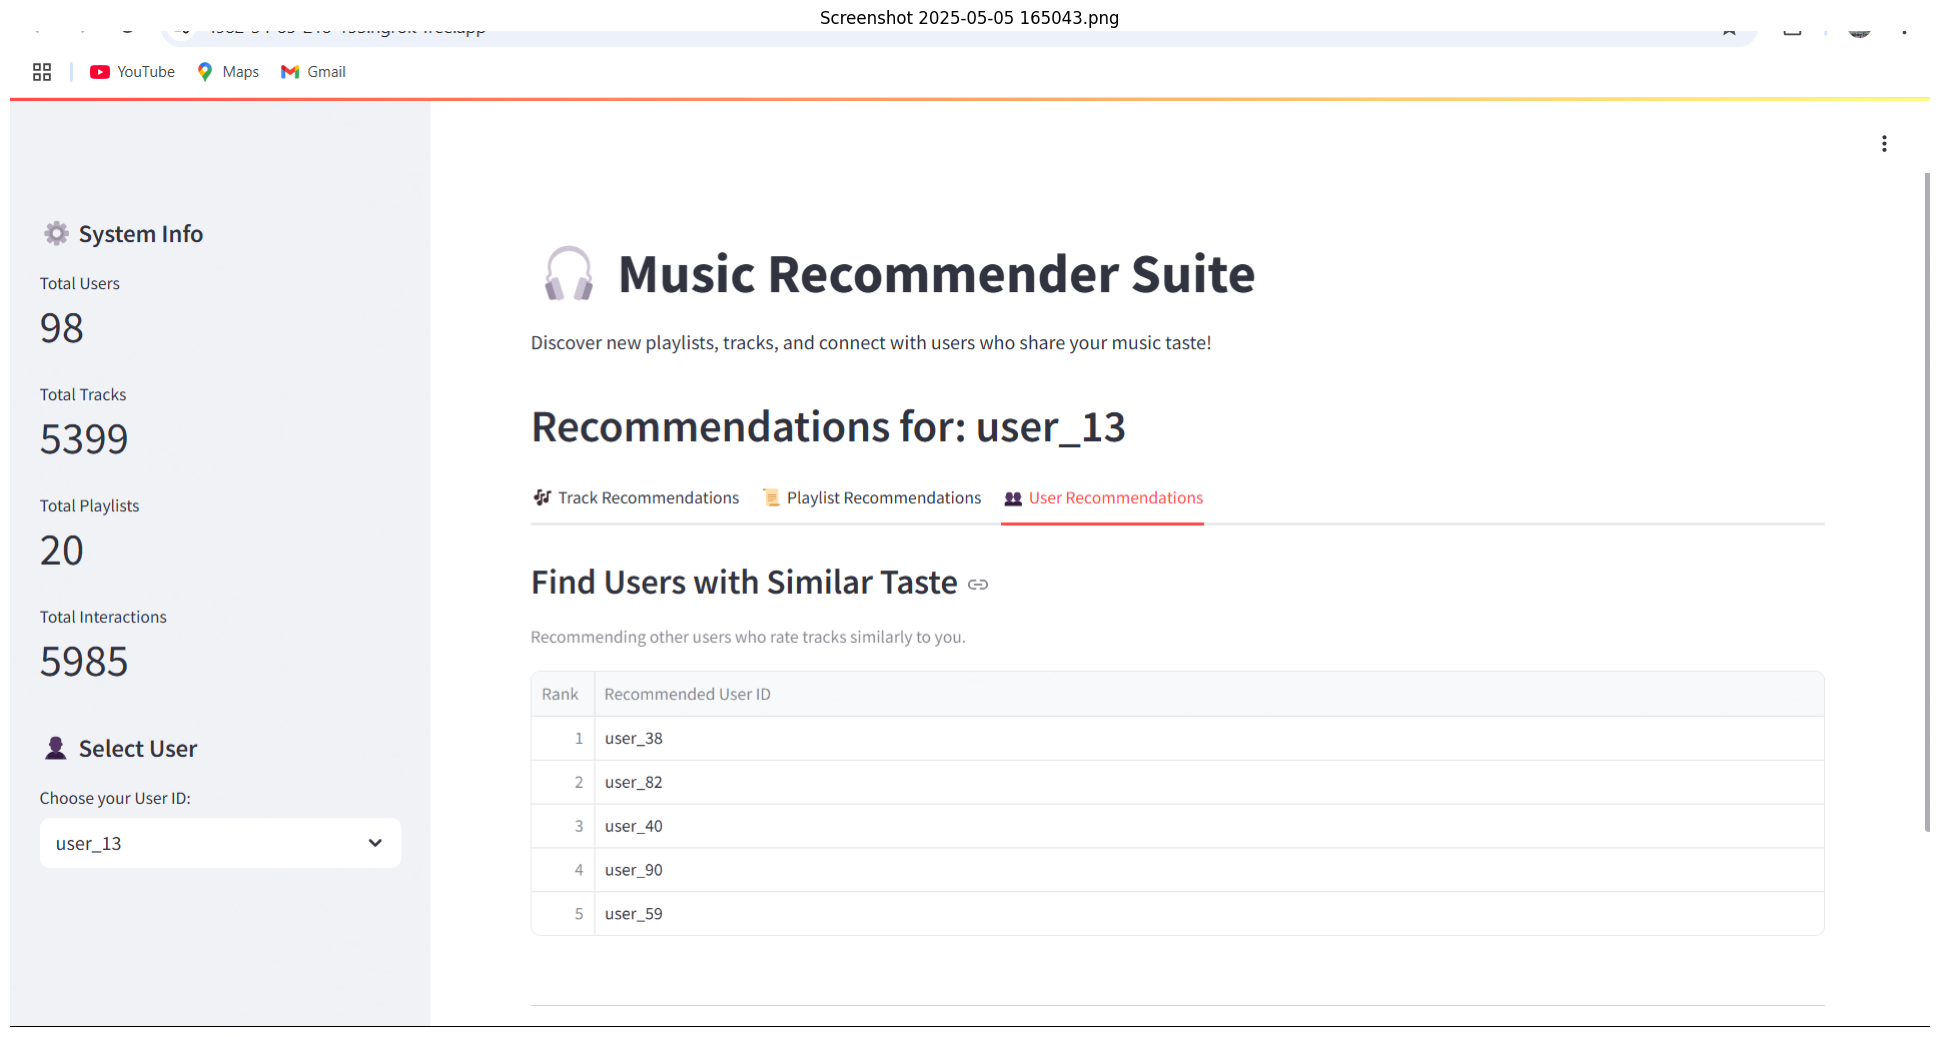

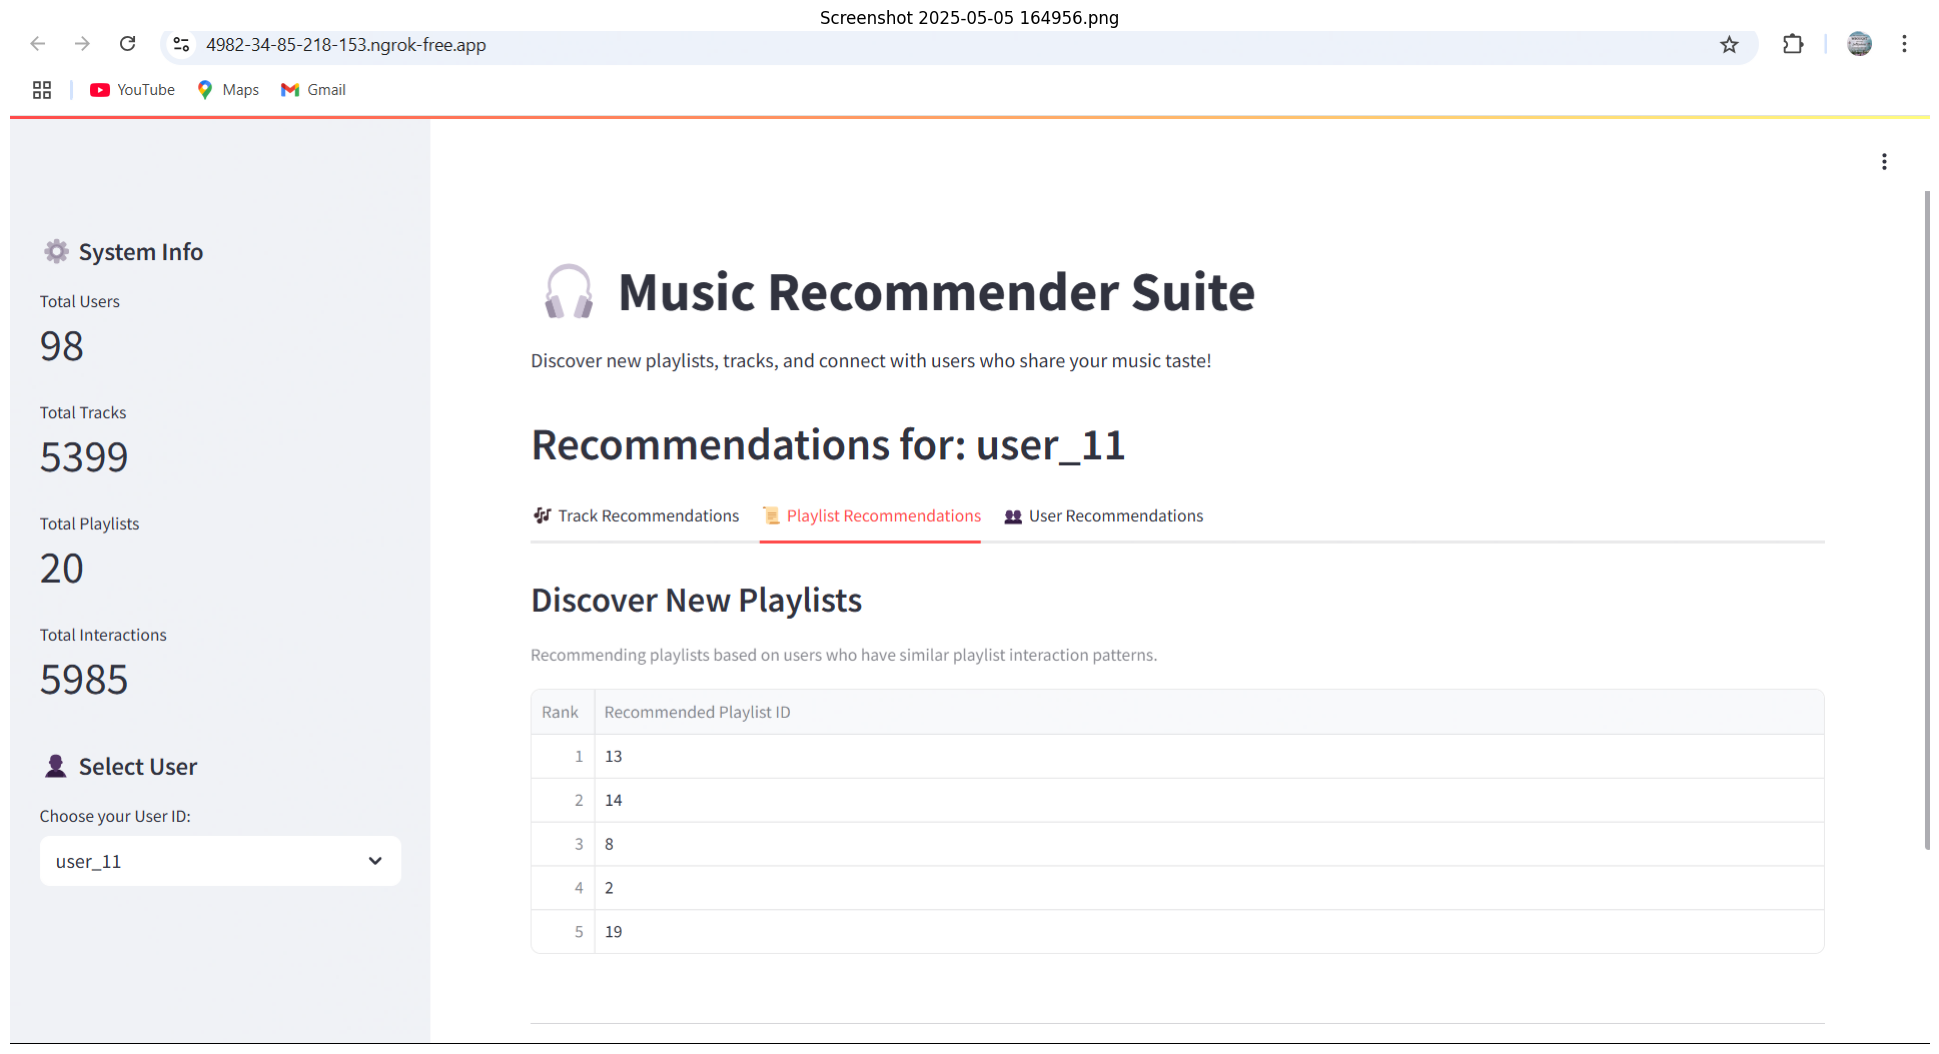

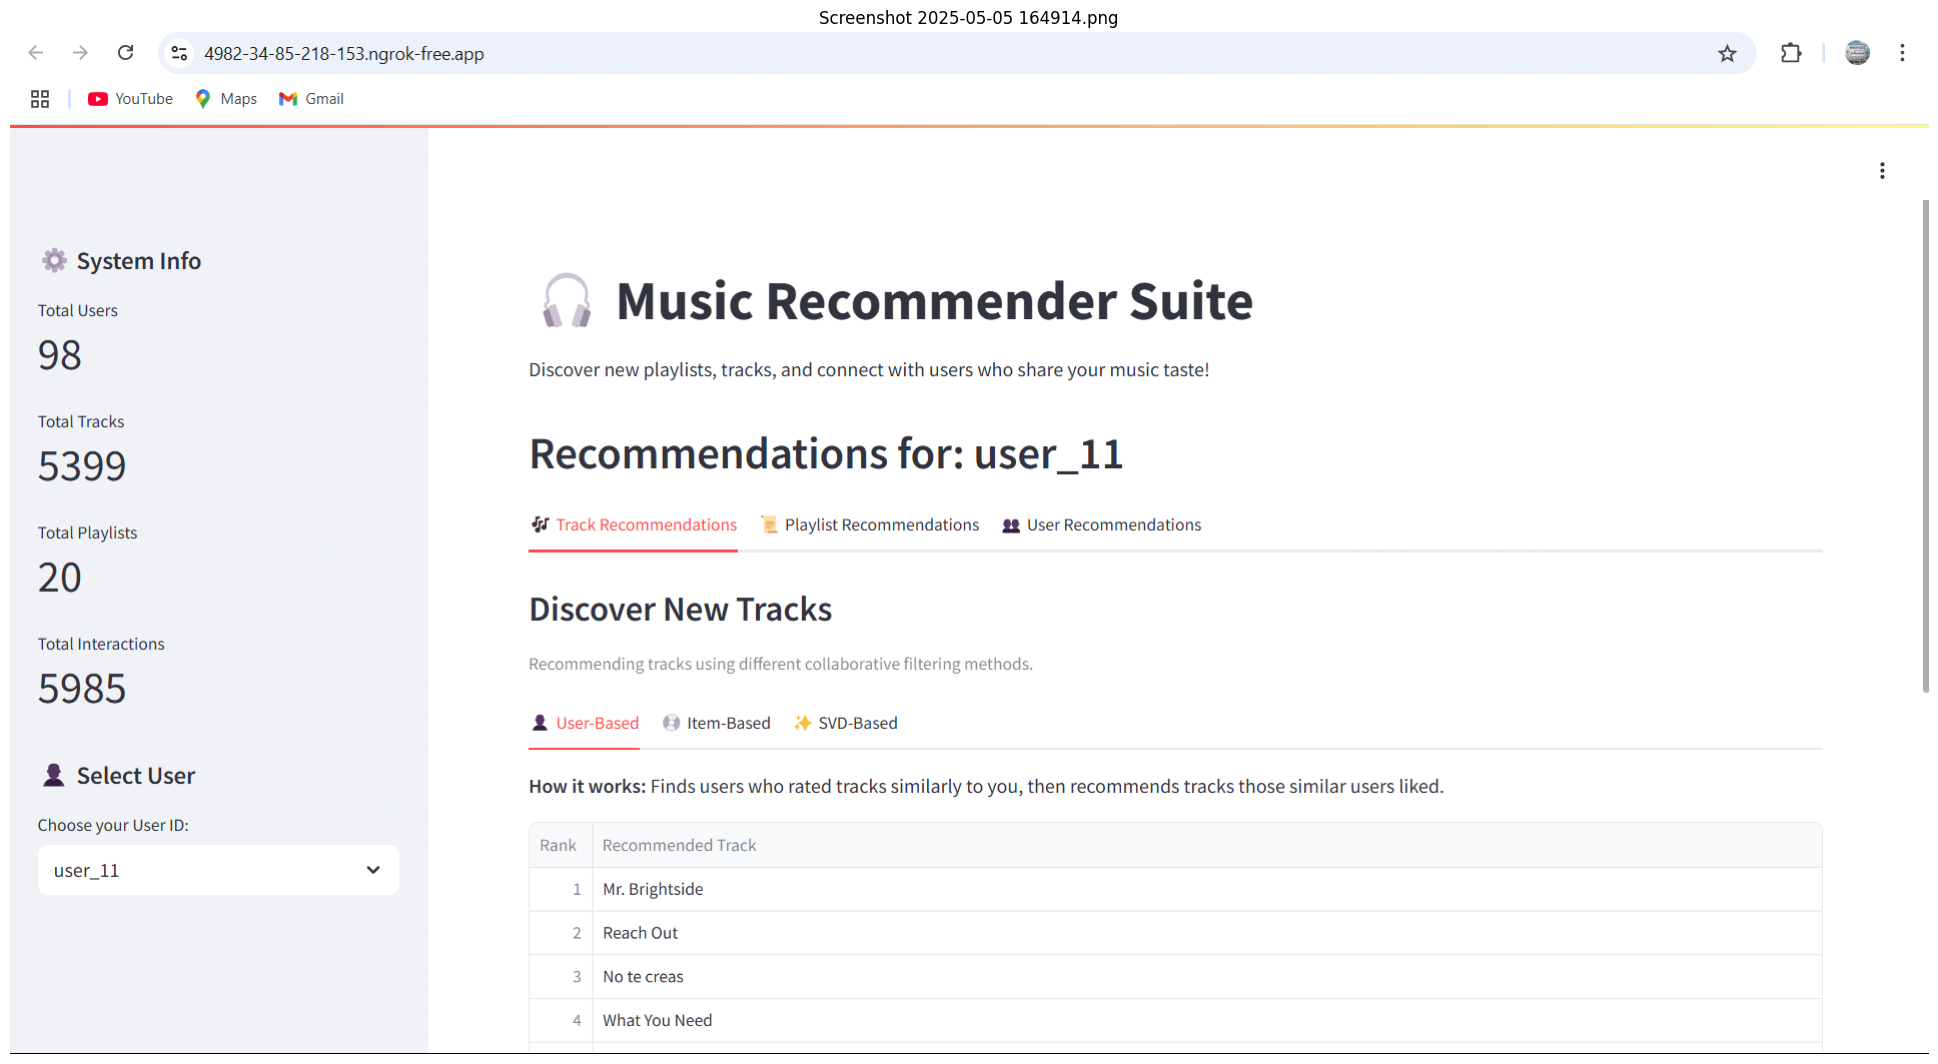

In [ ]:
import matplotlib.pyplot as plt

for filename in uploaded.keys():
  try:
    # Check if it's an image file (add more extensions if needed)
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif')):
      img = plt.imread(filename) # Read the image
      # Get the original image dimensions
      height, width, _ = img.shape

      # Calculate new dimensions (increase by a factor)
      new_height = int(height * 1.3)
      new_width = int(width * 1.3)

      # Resize the image using plt.figure and figsize
      plt.figure(figsize=(new_width / 100, new_height / 100))  # Adjust DPI as needed
      plt.imshow(img)
      plt.title(filename)
      plt.axis('off')  # Hide axis
      plt.show()

    else:
      print(f"Skipping '{filename}' (not an image file)")
  except Exception as e:
    print(f"Error displaying '{filename}': {e}")
